In [24]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import os
import pandas as pd

def ingest(directory):
    dataframes = []
    # Walk through each subdirectory of working directory
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith("-results.csv"):
                dataframes.append(pd.read_csv(os.path.join(root,file),sep=','))
    return dataframes

res1 = ingest('../../valid/discovery/discovery4/discovery-duration-fixed/')
#res2 = ingest('../../valid/discovery/discovery3/discovery-duration-fixed/')
df = pd.concat(res1+res2, axis=0)

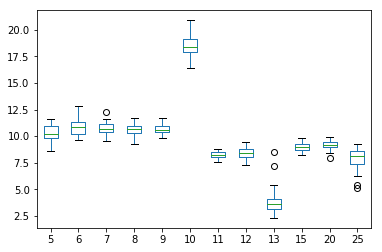

In [32]:
df.groupby(['duration', 'pass'])['test'].count().div(df.groupby(['duration', 'pass'])['duration'].max(), axis='index').unstack().T.plot(kind='box')

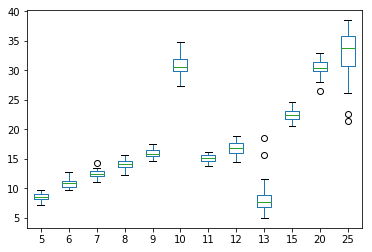

In [31]:
# Show how many beacons we capture total
df.groupby(['duration', 'pass'])['bssid'].count().div(len(pd.unique(df.bssid))).unstack().T.plot(kind='box')